In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
file = r'C:\Users\DELL\Downloads\Twitter_Data.csv\Twitter_Data.csv'
df= pd.read_csv(file)

In [8]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [12]:
df.shape

(162980, 2)

In [13]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [21]:
df.rename(columns={'category' : 'polarity'},inplace = True)

In [22]:
df

,clean_text,polarity
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [24]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "positive"
         

In [25]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [26]:
df.head(5)

,clean_text,polarity,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


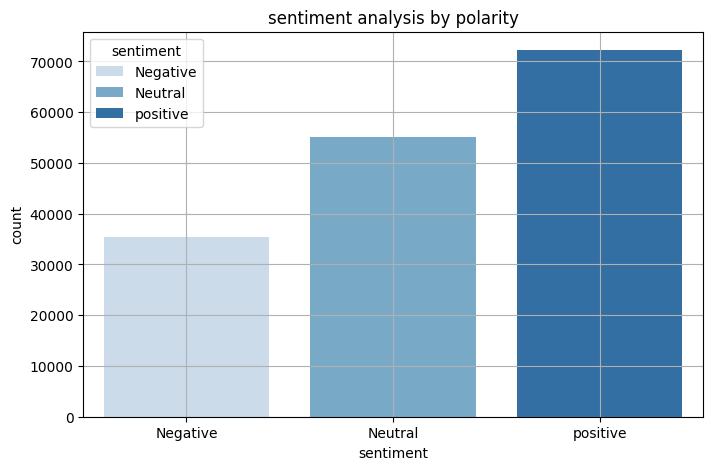

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x='sentiment',palette='Blues',hue='sentiment')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('sentiment analysis by polarity')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

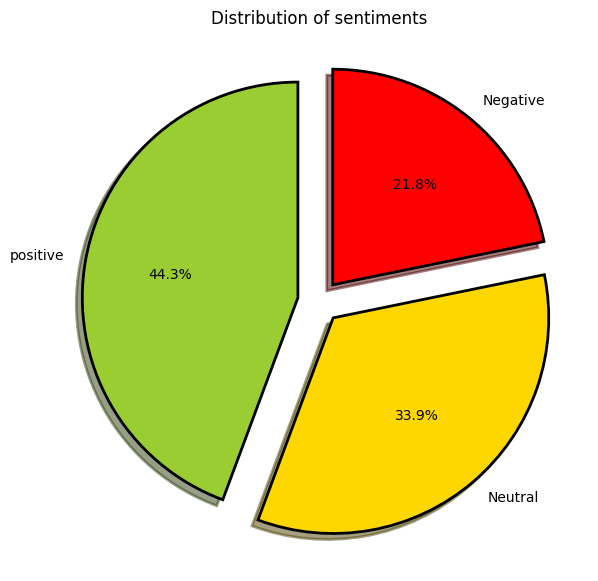

In [43]:
fig = plt.figure(figsize=(7,7))
color=('Blue')
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True,colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [47]:
from sklearn.model_selection import GridSearchCV

In [55]:
X = df['clean_text']
y = df['sentiment']

In [56]:

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 34, test_size=0.2)